In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

# Reading in Images

In [2]:
cat_files = glob("/kaggle/input/cat-and-dog/training_set/training_set/cats/*.jpg")
dog_files = glob("/kaggle/input/cat-and-dog/training_set/training_set/dogs/*.jpg")


In [3]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
print(img_mpl.shape, img_cv2.shape)

(232, 350, 3) (232, 350, 3)


## Image Array

(Height, Width, Channels)

<img src = "https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png"
     alt = "imgpixels" style = "height: 200px; width: 600px;"/>

In [4]:
img_mpl.max()/255
# Gives a range between 0 and 1 to show the intensity of a pixel

0.9882352941176471

In [5]:
img_mpl.flatten()

array([71, 70, 68, ..., 76, 59, 67], dtype=uint8)

We use `flatten` for an image array in image processing to convert a multi-dimensional array (typically representing an image) into a one-dimensional array (a vector). This is often necessary for various reasons in different contexts, including machine learning, computer vision, and numerical computation.

Here are the key reasons why `flatten` is commonly used:

### 1. **Simplify Image Representation**
- **2D Image Representation**: An image is typically represented as a 2D array (for grayscale) or a 3D array (for color images) where each element corresponds to a pixel or a channel value. For example:
  - A grayscale image: `image.shape = (height, width)`
  - A color image (RGB): `image.shape = (height, width, channels)`
  
- **Flattening**: The `flatten` function transforms these multi-dimensional arrays into a 1D array (vector). For example:
  - A 3x3 grayscale image with shape `(3, 3)` would become a vector of length 9.
  - A 3x3 RGB image with shape `(3, 3, 3)` would become a vector of length 27.

### 2. **Compatibility with Machine Learning Models**
- **Input to Models**: Many machine learning algorithms (especially traditional ones like SVM, Logistic Regression, and even Neural Networks) expect the input to be a one-dimensional vector rather than a multi-dimensional image array. Flattening the image ensures that it can be fed into models that work on tabular data or vectorized input.
  
- **Feature Vector**: Flattening helps create a **feature vector**, which is a simpler, linearized form of the image. This is useful in tasks like image classification, where you want to treat each pixel as a feature.

  **Example**: For a `28x28` pixel grayscale image (like in the MNIST dataset), the image has a shape of `(28, 28)`. Flattening it results in a 1D array of size `784` (`28 * 28 = 784`), which can be easily passed into a machine learning model.

### 3. **Numerical Computation & Matrix Operations**
- **Vector Operations**: In certain algorithms, it’s easier to perform matrix and vector operations (e.g., dot products, linear transformations) on flattened data. Many operations on images, such as transformations, filtering, and convolutions, might involve converting images into simpler 1D arrays.
  
- **Efficient Storage**: Flattening an image can also be useful for efficient storage or transmission when working with data pipelines.

### 4. **Interfacing with Libraries**
- Libraries like NumPy, OpenCV, and TensorFlow often expect or work better with flattened arrays for certain tasks. For instance, when reshaping or transforming images for deep learning frameworks, converting them to 1D arrays is necessary before applying some transformations.

### Example: Flattening a Grayscale Image

```python
import numpy as np
import cv2

# Load a grayscale image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Original shape of the image
print("Original shape:", image.shape)

# Flatten the image to 1D
flattened_image = image.flatten()
print("Flattened shape:", flattened_image.shape)


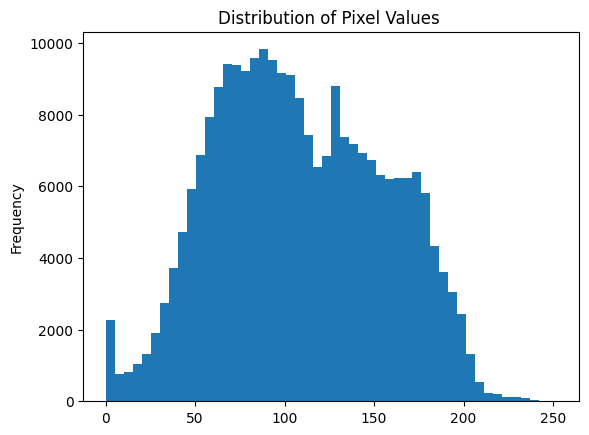

In [6]:
pd.Series(img_mpl.flatten()).plot(kind = 'hist', bins = 50, title = 'Distribution of Pixel Values ')
plt.show()

## Display Images

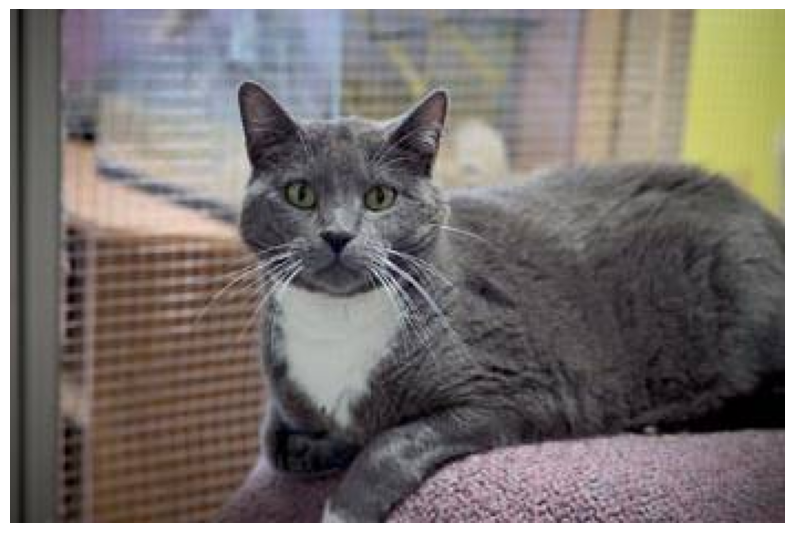

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.axis('off')
ax.imshow(img_mpl)
plt.show()

## Image Channels

RGB = Red, Green, Blue 

There are three channels

Any combination of those three channels can make perceivable colours by the human eye, and are used in computer displays and image scanners.

<img src="https://i.imgur.com/g0R7AD3.png" style = "height: 400px; width: 400px;" />

In [8]:
h, w, c = img_mpl.shape
print("Dimensions of the image is: \nHeight:", h, "pixels\nnWidth:", w, "pixels\nNumber of Channels:", c)

Dimensions of the image is: 
Height: 232 pixels
nWidth: 350 pixels
Number of Channels: 3


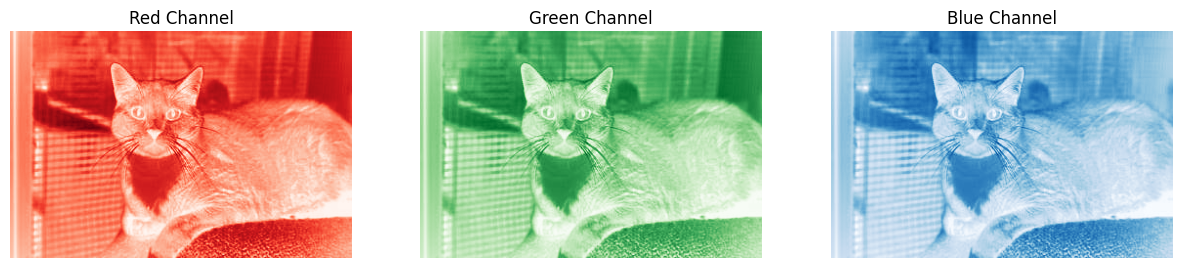

In [9]:
# Display RGB Channels of our image

fig, ax  = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_mpl[:, :, 0], cmap = 'Reds')
ax[1].imshow(img_mpl[:, :, 1], cmap = 'Greens')
ax[2].imshow(img_mpl[:, :, 2], cmap = 'Blues')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Red Channel')
ax[1].set_title('Green Channel')
ax[2].set_title('Blue Channel')
plt.show()

### Difference between Matplotlib Vs cv2 Numpy Arrays

- cv2 reads in channels as BGR
- matplot reads in channels as RGB

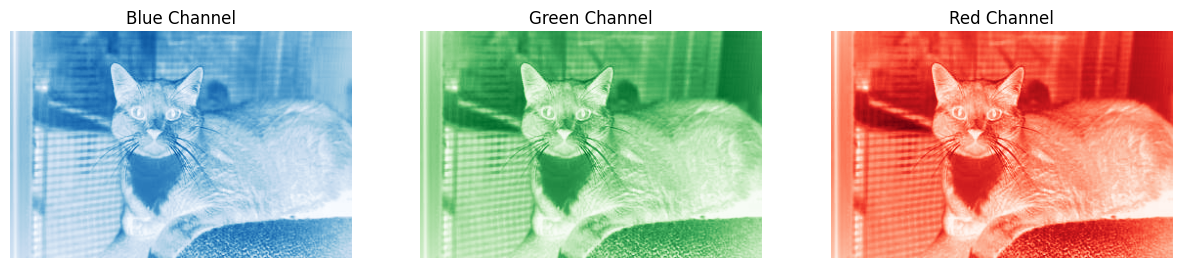

In [10]:
fig, ax  = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_cv2[:, :, 0], cmap = 'Blues')
ax[1].imshow(img_cv2[:, :, 1], cmap = 'Greens')
ax[2].imshow(img_cv2[:, :, 2], cmap = 'Reds')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Blue Channel')
ax[1].set_title('Green Channel')
ax[2].set_title('Red Channel')
plt.show()

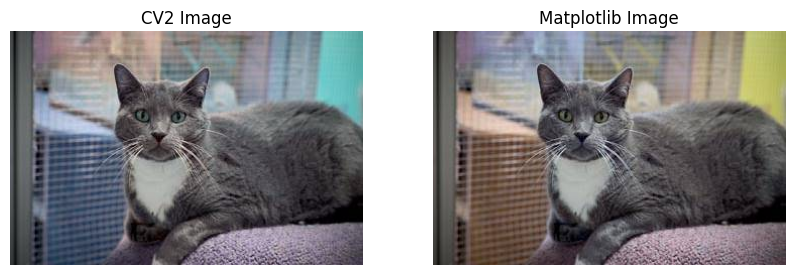

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_cv2)
ax[1].imshow(img_mpl)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('CV2 Image')
ax[1].set_title('Matplotlib Image')
plt.show()

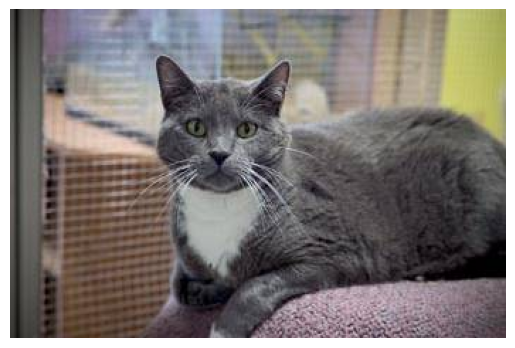

In [14]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()


## Image Manipulation

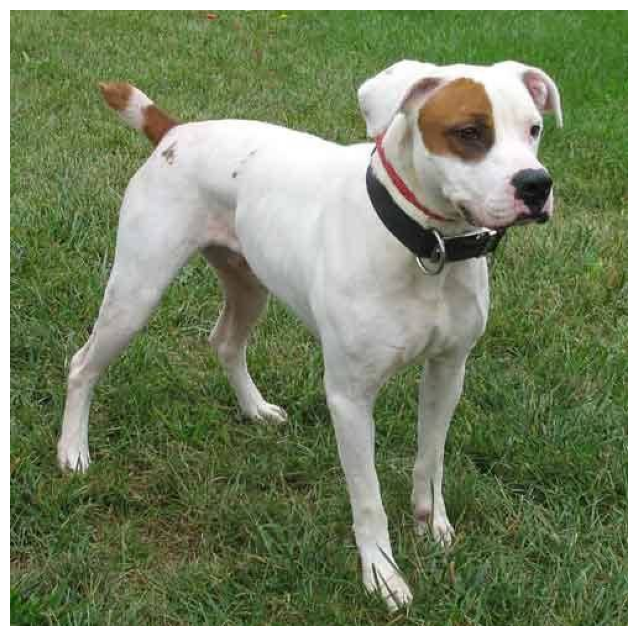

In [16]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

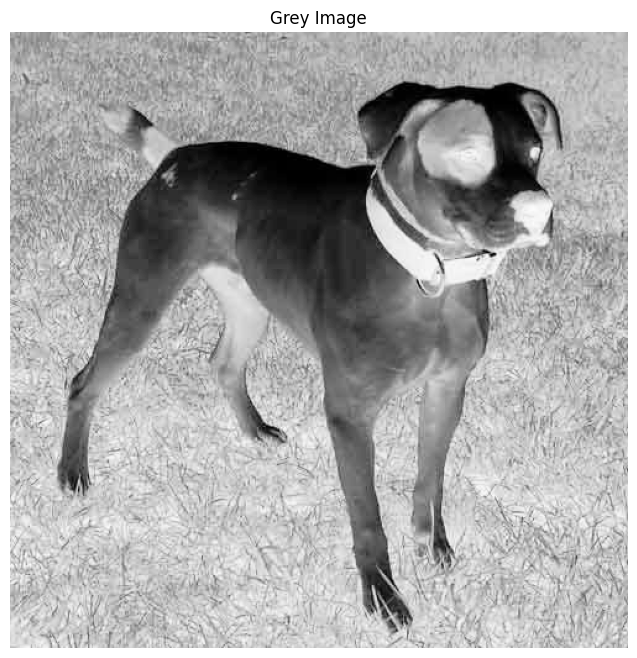

In [22]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_gray, cmap = 'Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

### Resizing and Scaling 

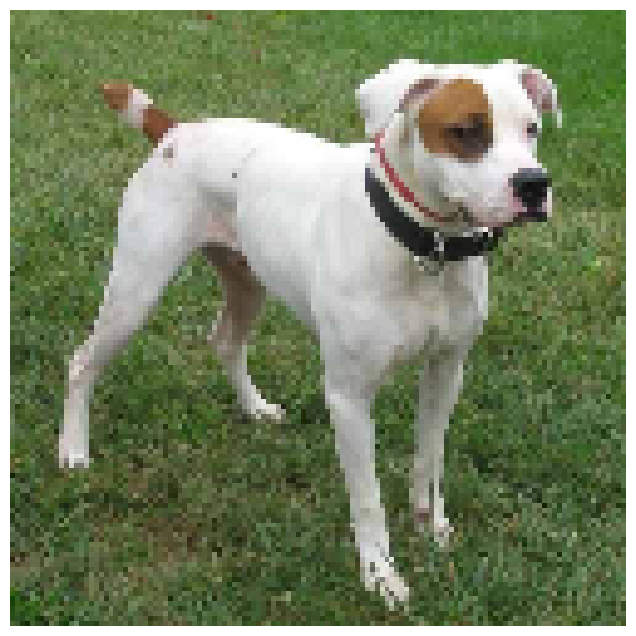

In [23]:
img_resized = cv2.resize(img, None, fx = 0.25, fy = 0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

In [24]:
img_resized.shape

(125, 125, 3)

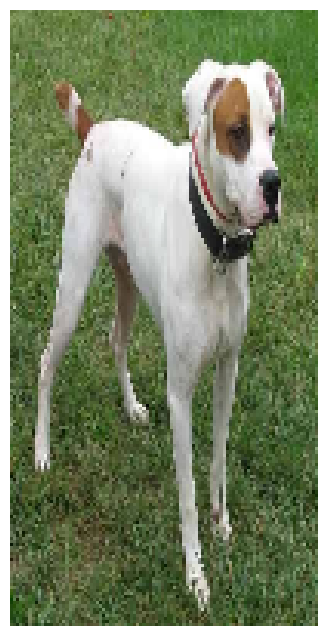

In [26]:
#Different

img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

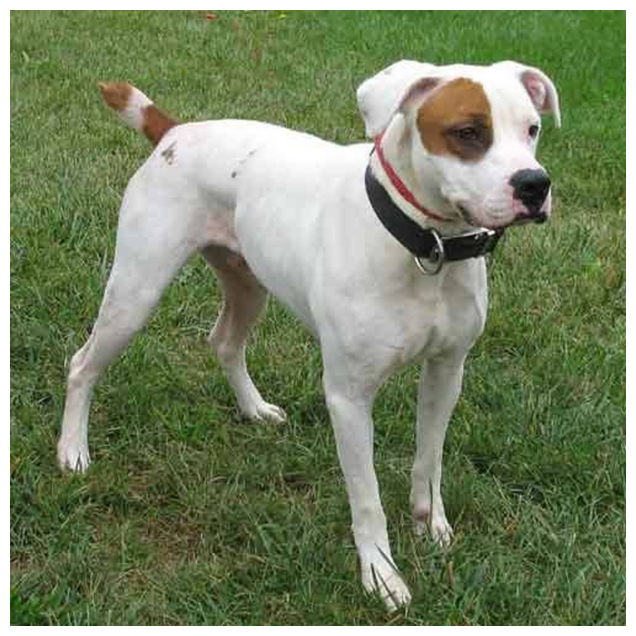

In [27]:
# when upscaling, need to scale an interpolation size 

img_big = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
#read up on interpolation techniques in documentation
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_big)
ax.axis('off')
plt.show()

In [29]:
img_big.shape, img.shape

((5000, 5000, 3), (499, 500, 3))

## Sharpening and Blurring

look up image kernels 

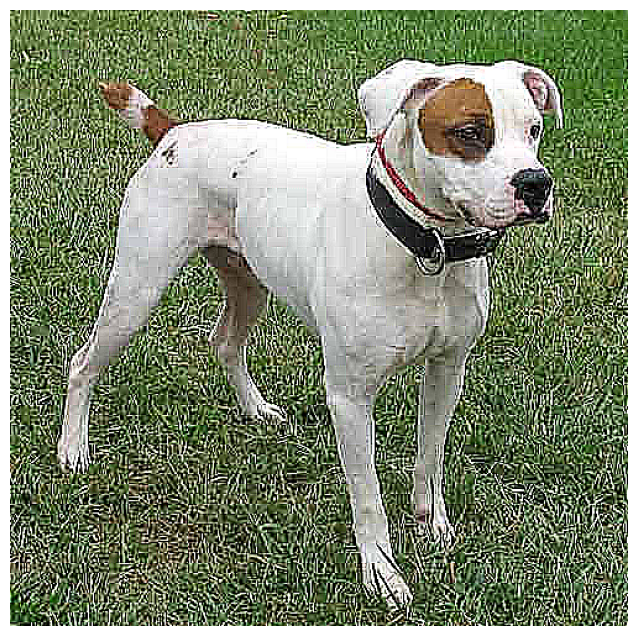

In [32]:
#Sharpen Image

kernel_sharpening = np.array(
                            [[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])

sharpened_img = cv2.filter2D(img, -1, kernel_sharpening)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened_img)
ax.axis('off')
plt.show()

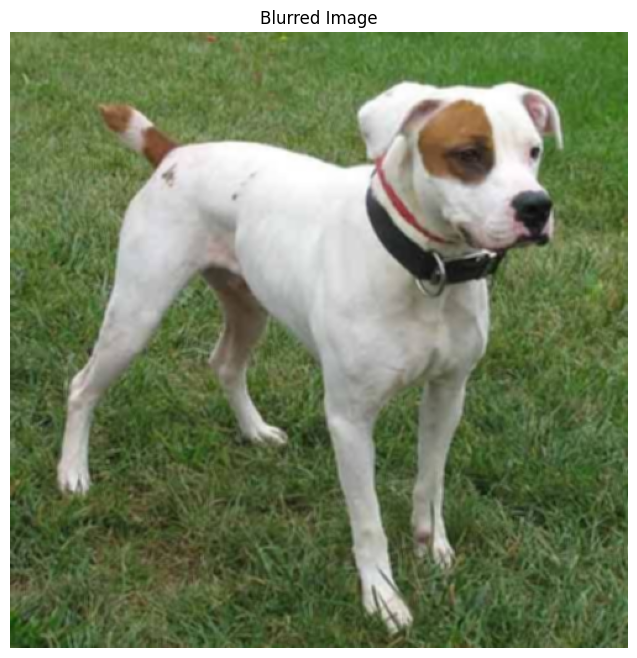

In [42]:
#Blurring

kernel_9x9 = np.ones((9,9), np.float32)/27
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

In [44]:
kernel_9x9

array([[0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],
       [0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704],


In [45]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True